# Collect Data
we will use only 10 sentences to create word vectors

# Word2Vec
Here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

In [1]:
corpus = ['king is the strong efficient man country', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [2]:
print(corpus)

['king is the strong efficient man country', 'queen is a wise woman', 'boy is a young man', 'girl is a young woman', 'prince is a young king', 'princess is a young queen', 'man is strong', 'woman is pretty', 'prince is a boy will be king', 'princess is a girl will be queen']


# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [3]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
         
    
    return results

In [4]:
corpus = remove_stop_words(corpus)
print(corpus)


['king the strong efficient man country', 'queen wise woman', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']


In [6]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [9]:
words

{'boy',
 'country',
 'efficient',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'the',
 'wise',
 'woman',
 'young'}

here we have word set by which we will have word vector

# data generation
we will generate label for each word using skip gram.  

In [10]:
word2int = {}
int2word = {}

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    print("Sentemce",sentence)
    for idx, word in enumerate(sentence):
        print("\nCurrent word",word)
        print("Word idx",idx)
        print(max(idx - WINDOW_SIZE, 0))
        print(min(idx + WINDOW_SIZE, len(sentence)))
        print(sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] )
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] :
            print("Neighbor",neighbor) 
            if neighbor != word:
                data.append([word, neighbor])
        print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")        
            #print("data",data)   
#print(data)                

Sentemce ['king', 'the', 'strong', 'efficient', 'man', 'country']

Current word king
Word idx 0
0
2
['king', 'the', 'strong']
Neighbor king
Neighbor the
Neighbor strong
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Current word the
Word idx 1
0
3
['king', 'the', 'strong', 'efficient']
Neighbor king
Neighbor the
Neighbor strong
Neighbor efficient
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Current word strong
Word idx 2
0
4
['king', 'the', 'strong', 'efficient', 'man']
Neighbor king
Neighbor the
Neighbor strong
Neighbor efficient
Neighbor man
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Current word efficient
Word idx 3
1
5
['the', 'strong', 'efficient', 'man', 'country']
Neighbor the
Neighbor strong
Neighbor efficient
Neighbor man
Neighbor country
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Current word man
Word idx 4
2
6
['strong', 'efficient', 'man', 'country']
Neighbor strong
Neighbor efficient
Neighbor man
Neighbor country
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Current word country
Word idx 5
3
6
['effic

In [ ]:
print(data)

[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'woman'], ['wise', 'queen'], ['wise', 'woman'], ['woman', 'queen'], ['woman', 'wise'], ['boy', 'young'], ['boy', 'man'], ['young', 'boy'], ['young', 'man'], ['man', 'boy'], ['man', 'young'], ['girl', 'young'], ['girl', 'woman'], ['young', 'girl'], ['young', 'woman'], ['woman', 'girl'], ['woman', 'young'], ['prince', 'young'], ['prince', 'king'], ['young', 'prince'], ['young', 'king'], ['king', 'prince'], ['king', 'young'], ['princess', 'young'], ['princess', 'queen'], ['young', 'princess'], ['young', 'queen'], ['queen', 'princess'], ['queen', 'young'], ['man', 'strong'], ['strong', 'man'], ['woman', 'pretty'], ['pretty', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'prince'], ['boy', 'king'], ['king', 'prince'], ['king', 'boy'], ['princess', 'girl'], ['princess', 'queen'], ['girl', 'princess'], ['girl', 'queen'], ['queen', 'princess']

In [12]:
for text in corpus:
    print(text)


king the strong efficient man country
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [11]:
word2int

{'boy': 0,
 'country': 2,
 'efficient': 7,
 'girl': 12,
 'king': 13,
 'man': 6,
 'pretty': 8,
 'prince': 4,
 'princess': 3,
 'queen': 9,
 'strong': 14,
 'the': 5,
 'wise': 10,
 'woman': 11,
 'young': 1}

In [13]:
import pandas as pd

df = pd.DataFrame(data, columns = ['input', 'label'])
df

,input,label
0,king,the
1,king,strong
2,the,king
3,the,strong
4,the,efficient
...,...,...
59,princess,queen
60,girl,princess
61,girl,queen
62,queen,princess


In [23]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))
print(X)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1.

In [24]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

print(X_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

# Define Tensorflow Graph

In [27]:


# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
hidden_layer2 = tf.add(tf.matmul(hidden_layer, W2), b2)
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))
# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [26]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 


# Train

In [30]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration= 30000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 10000 == 0:
      #print('predicted ',sess.run(prediction[:3], feed_dict={x: X_train, y_label: Y_train}))
      print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))
    

iteration 0 loss is :  3.607666
iteration 10000 loss is :  1.859976
iteration 20000 loss is :  1.8230268


In [31]:
# Now the hidden layer (W1 + b1) is actually the word look up table
print(sess.run(W1))
vectors = sess.run(W1 + b1)
print(vectors)

[[ 0.24610469  0.47509444]
 [-0.550326   -0.5499218 ]
 [ 4.4939823  -2.9309657 ]
 [-5.5426397   2.5462642 ]
 [ 3.299784    3.7384462 ]
 [ 4.8396955   2.4700053 ]
 [ 2.0231485   2.172231  ]
 [ 0.18495661 -0.98697835]
 [-2.410187   -2.2254202 ]
 [-1.2887005  -0.17227691]
 [-5.4440484   1.3165939 ]
 [-1.3694319   0.30544403]
 [-2.0729833   0.16357042]
 [ 0.37993795  0.71544075]
 [ 1.8619332  -2.0514736 ]]
[[ 0.70595956  0.9349493 ]
 [-0.09047115 -0.09006697]
 [ 4.9538374  -2.4711108 ]
 [-5.0827847   3.006119  ]
 [ 3.7596388   4.1983013 ]
 [ 5.29955     2.92986   ]
 [ 2.4830034   2.6320858 ]
 [ 0.64481145 -0.5271235 ]
 [-1.9503322  -1.7655654 ]
 [-0.8288456   0.28757793]
 [-4.984194    1.7764487 ]
 [-0.909577    0.76529884]
 [-1.6131284   0.62342525]
 [ 0.8397928   1.1752956 ]
 [ 2.321788   -1.5916188 ]]


# word vector in table

In [32]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,boy,0.705960,0.934949
1,young,-0.090471,-0.090067
2,country,4.953837,-2.471111
3,princess,-5.082785,3.006119
4,prince,3.759639,4.198301
5,the,5.299550,2.929860
6,man,2.483003,2.632086
7,efficient,0.644811,-0.527124
8,pretty,-1.950332,-1.765565
9,queen,-0.828846,0.287578


# word vector in 2d chart

In [33]:
vectors = sess.run(W1 + b1)

print(vectors[ word2int['girl'] ])

[-1.6131284   0.62342525]


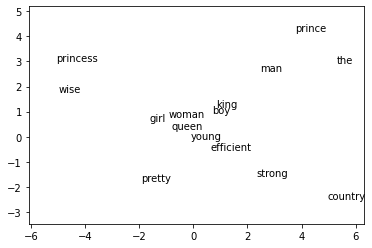

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [ ]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [ ]:
print(int2word[find_closest(word2int['boy'], vectors)])
print(int2word[find_closest(word2int['woman'], vectors)])
print(int2word[find_closest(word2int['prince'], vectors)])

NameError: ignored